In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output="pandas")
from preprocessing_93 import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter('ignore')
RSEED = 5


df = pd.read_csv("data/AQUASTAT_complete.csv")


pre_split_processor = get_pre_split_processor_93()
df_pre = pre_split_processor.fit_transform(df)


df_pre = df_pre.query("year > 1992")

full_preprocessor = get_full_preprocessor_93(df_pre.columns.to_list(), hot=False)

df_pro = full_preprocessor.fit_transform(df_pre)



In [3]:
df_pro.head()



,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,groundwater_accounted_inflow,...,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable,country,year,gdp_per_capita,water_stress,total_population_with_access_to_safe_drinking_water
29,0.42963,-0.106528,1.105174,1.001781,1.317100,2.337318,0.734579,0.251313,0.084084,-0.087237,...,-0.096457,0.973941,1.605272,-0.264962,-0.202617,Afghanistan,1993,179.839036,61.906480,21.4
30,0.42963,-0.121301,1.096506,0.993103,1.315969,2.639310,0.726701,0.243083,0.084084,-0.087237,...,-0.136904,0.962895,1.462471,-0.220348,-0.202617,Afghanistan,1994,100.444869,60.475171,21.4
31,0.42963,-0.128683,1.087626,0.984213,1.314784,2.473168,0.722750,0.236760,0.084084,-0.087237,...,-0.226799,0.951585,1.347776,-0.183809,-0.202617,Afghanistan,1995,152.221868,59.043863,21.5
32,0.42963,-0.128807,1.078526,0.975102,1.313539,2.411257,0.722684,0.232441,0.084084,-0.087237,...,-0.189200,0.939998,1.260279,-0.155988,-0.202617,Afghanistan,1996,141.607370,57.612555,23.3
33,0.42963,-0.124127,1.069192,0.965757,1.312230,2.368001,0.725190,0.229608,0.084084,-0.087237,...,-0.203122,0.928119,1.191977,-0.134623,-0.202617,Afghanistan,1997,151.085927,56.181246,25.0


In [4]:
label_encoder = LabelEncoder()
df_pro['country'] = label_encoder.fit_transform(df_pro['country'])

In [5]:
from tsfresh import extract_features

# Extract columns
value_columns = df_pro.drop(columns=['country', 'year']).columns

# Initialize lists to store data for long format dataframe
ids = []
times = []
values = []
names = []

# Loop through each value column and append data to lists
for col in value_columns:
    ids.extend(df_pro['country'].values)
    times.extend(df_pro['year'].values)
    values.extend(df_pro[col].values)
    names.extend([col] * len(df_pro))

# Create long format dataframe
long_data = pd.DataFrame({
    'id': ids,
    'time': times,
    'value': values,
    'variable': names
})

long_data.tail()


,id,time,value,variable
166791,160,2016,76.9,total_population_with_access_to_safe_drinking_...
166792,160,2017,76.9,total_population_with_access_to_safe_drinking_...
166793,160,2018,76.9,total_population_with_access_to_safe_drinking_...
166794,160,2019,76.9,total_population_with_access_to_safe_drinking_...
166795,160,2020,76.9,total_population_with_access_to_safe_drinking_...


In [6]:
long_data = long_data[pd.to_numeric(long_data['value'], errors='coerce').notnull()]

In [7]:
print(long_data['value'].apply(type).unique())

[<class 'float'>]


In [8]:
# Extract features
features = extract_features(long_data, column_id='id', column_sort='time', column_value='value')

print(features.head())


Feature Extraction:   0%|          | 0/10 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 10/10 [02:19<00:00, 13.92s/it]

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             1.0                       0.0   
1                                             1.0                       0.0   
2                                             1.0                       0.0   
3                                             1.0                       0.0   
4                                             1.0                       0.0   

   value__has_duplicate_min  value__has_duplicate  value__sum_values  \
0                       0.0                   1.0       12366.838563   
1                       0.0                   1.0       83563.685129   
2                       0.0                   1.0       96195.496627   
3                       0.0                   1.0       69333.733941   
4                       0.0                   1.0      262438.565248   

   value__abs_energy  value__mean_abs_change  value__mean_change  \
0       4.261732e+06    

In [9]:
from sklearn.preprocessing import StandardScaler

# Replace NaN values with 0 or use imputation techniques
features.fillna(0, inplace=True)

# Scale the imputed features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [10]:
print(features.head())


   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             1.0                       0.0   
1                                             1.0                       0.0   
2                                             1.0                       0.0   
3                                             1.0                       0.0   
4                                             1.0                       0.0   

   value__has_duplicate_min  value__has_duplicate  value__sum_values  \
0                       0.0                   1.0       12366.838563   
1                       0.0                   1.0       83563.685129   
2                       0.0                   1.0       96195.496627   
3                       0.0                   1.0       69333.733941   
4                       0.0                   1.0      262438.565248   

   value__abs_energy  value__mean_abs_change  value__mean_change  \
0       4.261732e+06    

In [59]:
# from sklearn.decomposition import PCA


# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# reduced_features = pca.fit_transform(features)
# num_pcs = pca.n_components_
# print(f"Number of principal components: {num_pcs}")
# print(pca.explained_variance_ratio_)

Number of principal components: 1
[0.99909083]


In [ ]:
# pca_2d = PCA(n_components=2)
# reduced_2d = pca_2d.fit_transform(scaled_features)

In [14]:
import hdbscan

# Initialize HDBSCAN
clusterer = hdbscan.HDBSCAN(min_samples=5, gen_min_span_tree=True)

# Fit the model
#clusters_hdbscan = clusterer.fit_predict(reduced_features)
clusters_hdbscan = clusterer.fit_predict(features)

print(np.unique(clusters_hdbscan))


[-1  0  1  2  3  4  5  6  7  8]


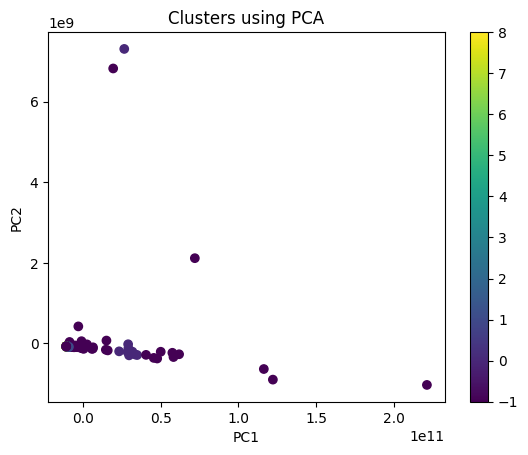

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and reduce to 2 dimensions
pca_vis = PCA(n_components=5)
reduced_vis = pca_vis.fit_transform(features)

# Plot
plt.scatter(reduced_vis.iloc[:, 0], reduced_vis.iloc[:, 1], c=clusters_hdbscan, cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters using PCA')
plt.colorbar()
plt.show()


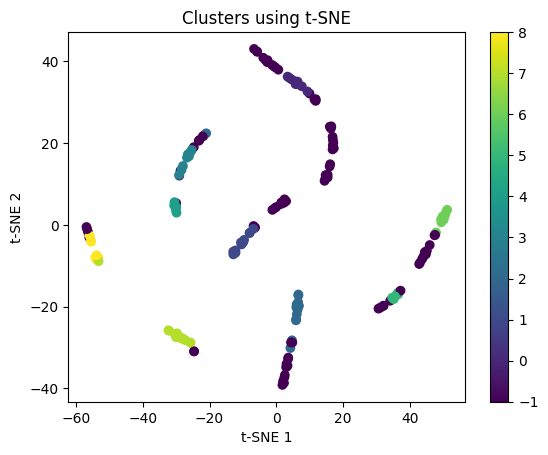

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE and reduce to 2 dimensions
tsne_vis = TSNE(n_components=2, random_state=5, perplexity=5, learning_rate=20)  # setting random_state for reproducibility
reduced_vis_tsne = tsne_vis.fit_transform(features)

# Plot
plt.scatter(reduced_vis_tsne[:, 0], reduced_vis_tsne[:, 1], c=clusters_hdbscan, cmap='viridis')

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clusters using t-SNE')
plt.colorbar()
plt.show()






In [18]:
# add the cluster labels from HDBSCAN
cluster_df = pd.DataFrame({
    'country': features.index,  # Assuming that the index of 'features' is the country ID.
    'cluster': clusters_hdbscan
})

df_pro = pd.merge(df_pro, cluster_df, on='country', how='left')

df_pro['country'] = label_encoder.inverse_transform(df_pro['country'])

# filter by cluster
for cluster_label in np.unique(clusters_hdbscan):
    print(f"Cluster {cluster_label}:")
    countries_in_cluster = df_pro[df_pro['cluster'] == cluster_label]['country'].unique()
    print(countries_in_cluster)
    print("\n")

for cluster_label in np.unique(clusters_hdbscan):
    print(f"Summary for Cluster {cluster_label}:")
    print(df_pro[df_pro['cluster'] == cluster_label].describe())
    print("\n")

for cluster_label in np.unique(clusters_hdbscan):
    print(f"Summary for Cluster {cluster_label}:")
    print(df_pro[df_pro['cluster'] == cluster_label].describe())
    print("\n")

Cluster -1:
['Albania' 'Angola' 'Argentina' 'Australia' 'Bahrain' 'Barbados'
 'Botswana' 'Bulgaria' 'Burundi' 'Cameroon' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Dominican Republic' 'Estonia' 'Eswatini' 'Ghana' 'Greece'
 'Guinea' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Ireland' 'Israel' 'Italy' 'Jordan' 'Kenya'
 'Kuwait' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Malta'
 'Mauritania' 'Morocco' 'Nepal' 'Netherlands (Kingdom of the)'
 'New Zealand' 'Nigeria' 'Norway' 'Oman' 'Pakistan' 'Panama' 'Poland'
 'Portugal' 'Puerto Rico' 'Qatar' 'Republic of Korea'
 'Republic of Moldova' 'Saudi Arabia' 'Senegal' 'Slovakia' 'Slovenia'
 'Somalia' 'South Africa' 'Spain' 'Suriname' 'Sweden' 'Switzerland'
 'Syrian Arab Republic' 'Thailand' 'Trinidad and Tobago' 'Tunisia'
 'Turkmenistan' 'United Republic of Tanzania' 'United States of America'
 'Uruguay' 'Yemen' 'Zambia' 'Zimbabwe']




In [107]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
#clusters_dbscan = dbscan.fit_predict(reduced_features)
clusters_dbscan = dbscan.fit_predict(features)

print(np.unique(clusters_dbscan))



[-1]


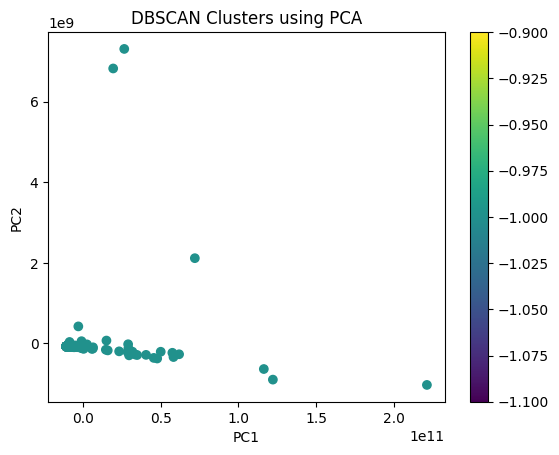

In [78]:
# Plot using DBSCAN clusters
plt.scatter(reduced_vis.iloc[:, 0], reduced_vis.iloc[:, 1], c=clusters_dbscan, cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters using PCA')
plt.colorbar()
plt.show()

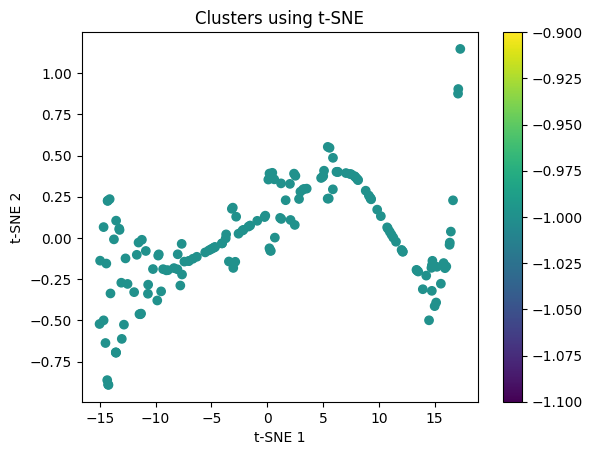

In [106]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE and reduce to 2 dimensions
tsne_vis = TSNE(n_components=2, random_state=5, perplexity=30, learning_rate=20)  # setting random_state for reproducibility
reduced_vis_tsne = tsne_vis.fit_transform(features)

# Plot
plt.scatter(reduced_vis_tsne[:, 0], reduced_vis_tsne[:, 1], c=clusters_dbscan, cmap='viridis')

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clusters using t-SNE')
plt.colorbar()
plt.show()